In [1]:
import pandas as pd
import re

# Replace 'your_file.csv' with the path to your CSV file
csv_file = r"C:\Users\AMRAN\OneDrive - Aalborg Universitet\8. semester\Projekt\CODE\Machine Learning\Data\Labels_names.csv"

# Read the CSV file
df = pd.read_csv(csv_file)

# Assuming the column with the names is called 'name_column'
name_column = 'File Name'

label_column = 'Label'

# Extract the required information using a regex pattern
pattern = re.compile(r't\d{8}(\d{1,2})\d{3}')

def extract_number(name):
    match = pattern.match(name)
    if match:
        return int(match.group(1))
    return None

# Add a new column with the extracted numbers
df['number'] = df[name_column].apply(extract_number)

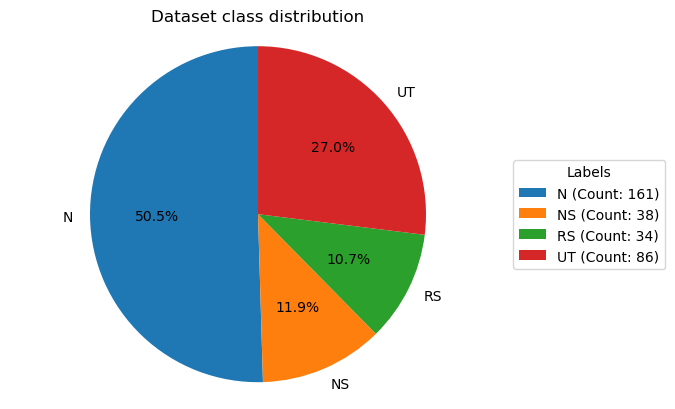

Label
N     161
NS     38
RS     34
UT     86
Name: count, dtype: int64


In [2]:
# DATASET VISUALISATION

import matplotlib.pyplot as plt

# Filter the DataFrame for filenames starting with 't'
filtered_df = df[df[name_column].str.startswith('id')]

# Function to plot the pie chart for all test numbers combined
def plot_combined_pie_chart(counts):
    fig, ax = plt.subplots()
    wedges, _, _ = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    
    # Create legend with label and count information
    legend_labels = [f'{label} (Count: {count})' for label, count in zip(counts.index, counts)]
    ax.legend(wedges, legend_labels, title='Labels', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax.set_title('Dataset class distribution')
    plt.show()

# Count the occurrences of each label for all test numbers combined in the filtered DataFrame
combined_label_counts = filtered_df[label_column].value_counts().sort_index()

# Plot the pie chart for all test numbers combined
plot_combined_pie_chart(combined_label_counts)
print(combined_label_counts)

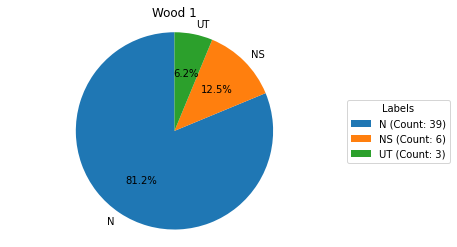

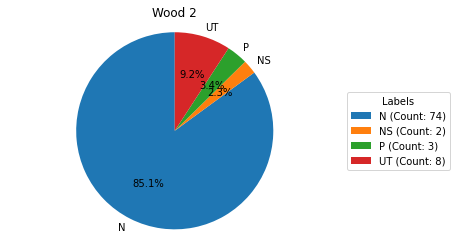

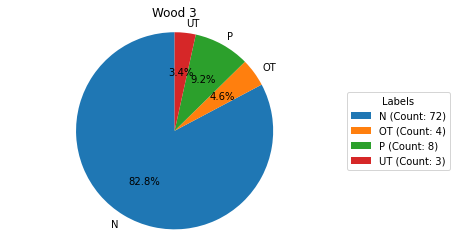

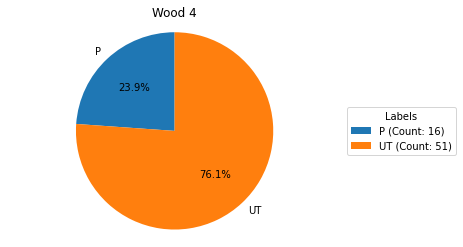

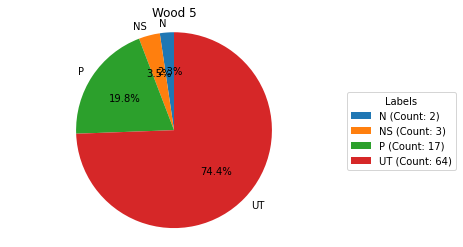

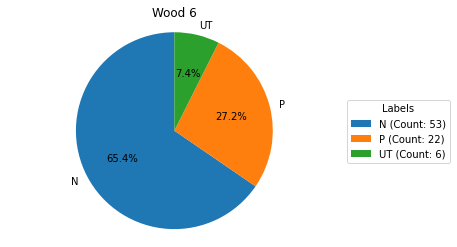

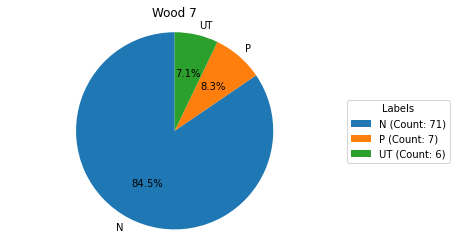

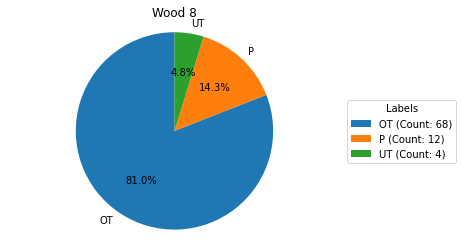

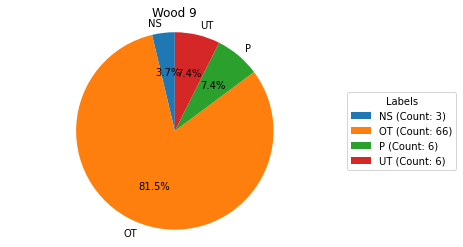

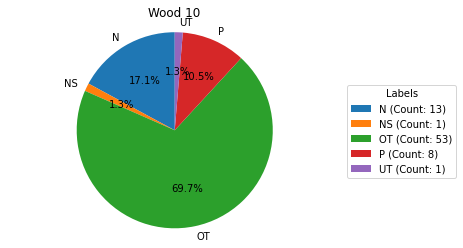

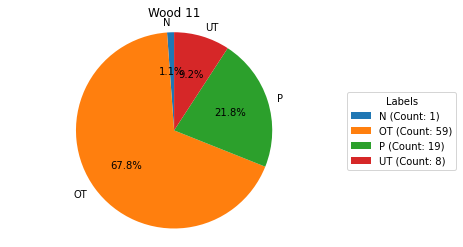

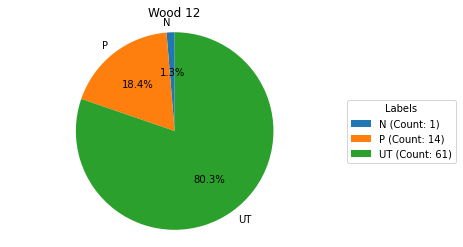

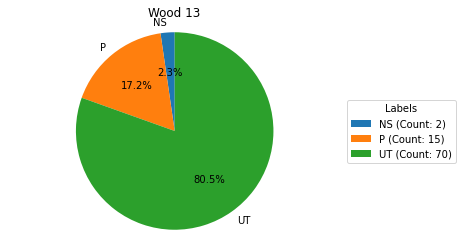

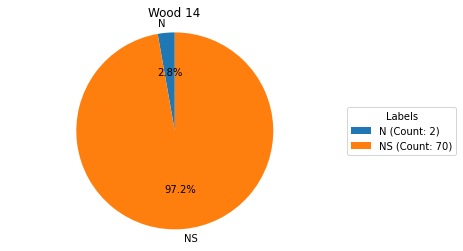

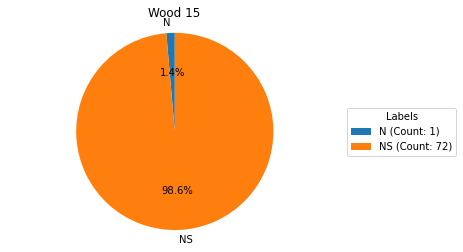

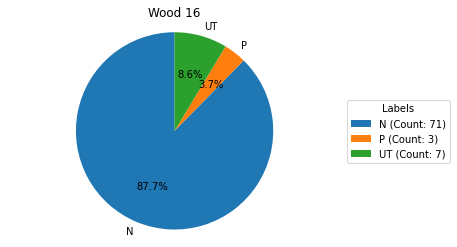

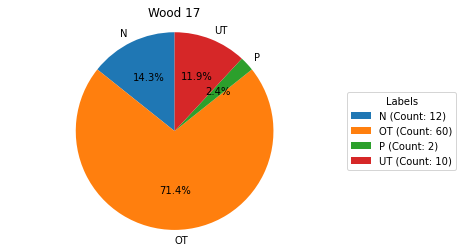

In [12]:
# VISUALISATION OF DIFFERENT WOOD


import matplotlib.pyplot as plt

# Function to plot the pie chart for a specific number
def plot_pie_chart(number, counts):
    fig, ax = plt.subplots()
    wedges, _, _ = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    
    # Create legend with label and count information
    legend_labels = [f'{label} (Count: {count})' for label, count in zip(counts.index, counts)]
    ax.legend(wedges, legend_labels, title='Labels', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax.set_title(f'Wood {number}')
    plt.show()

# Loop through each test number (1-17)
for number in range(1, 18):
    # Filter the DataFrame for the current number
    filtered_df = df[df['number'] == number]
    
    # Count the occurrences of each label
    label_counts = filtered_df[label_column].value_counts().sort_index()
    
    # Plot the pie chart for the current number
    plot_pie_chart(number, label_counts)
